In [52]:
from db_conn import query_from_db as sql_query
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
ai_comp = sql_query("""

SELECT c.CompanyName, c.YearFounded
FROM Company c
WHERE c.YearFounded BETWEEN 2017 AND 2023
   AND (c.CompanyName LIKE '%.AI%' OR c.CompanyName LIKE 'AI%')
""")
ai_comp

Connected to pitchbook_db database


Query Progress: 0 row [00:00, ? row/s]/Users/student/Documents/UNI/2023 Fall/Consultancy Project/EXAM 60%/PyNotebooks/db_conn.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  chunk = pd.read_sql_query(chunk_query, connection)
Query Progress: 1535 row [00:01, 884.11 row/s] 

Query took 1.74 seconds
Connection closed


,CompanyName,YearFounded
0,Airspace Experience Technologies,2017.0
1,Socrates.Ai,2017.0
2,AI-medic,2020.0
3,AirTrip,2017.0
4,AIS,2020.0
...,...,...
1530,IVP.ai,2022.0
1531,AI Like Me,2023.0
1532,4-Eyes.ai,2023.0
1533,ComeHome.ai,2023.0


In [54]:
ai_comp_new = sql_query("""

SELECT c.CompanyName, c.YearFounded
FROM Company c
WHERE c.YearFounded BETWEEN 2010 AND 2016
   AND (c.CompanyName LIKE '%.AI%' OR c.CompanyName LIKE 'AI%')
""")
ai_comp_new

Connected to pitchbook_db database


Query Progress: 0 row [00:00, ? row/s]/Users/student/Documents/UNI/2023 Fall/Consultancy Project/EXAM 60%/PyNotebooks/db_conn.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  chunk = pd.read_sql_query(chunk_query, connection)
Query Progress: 816 row [00:01, 471.87 row/s]

Query took 1.73 seconds
Connection closed


,CompanyName,YearFounded
0,Airspace Indoor Skydiving,2014.0
1,AidApp,2013.0
2,Airmove,2012.0
3,Composure.ai,2013.0
4,Airtable,2012.0
...,...,...
811,AirPalm,2012.0
812,Harvest.ai,2014.0
813,Aircraft Intelligence,2012.0
814,Airbanq,2014.0


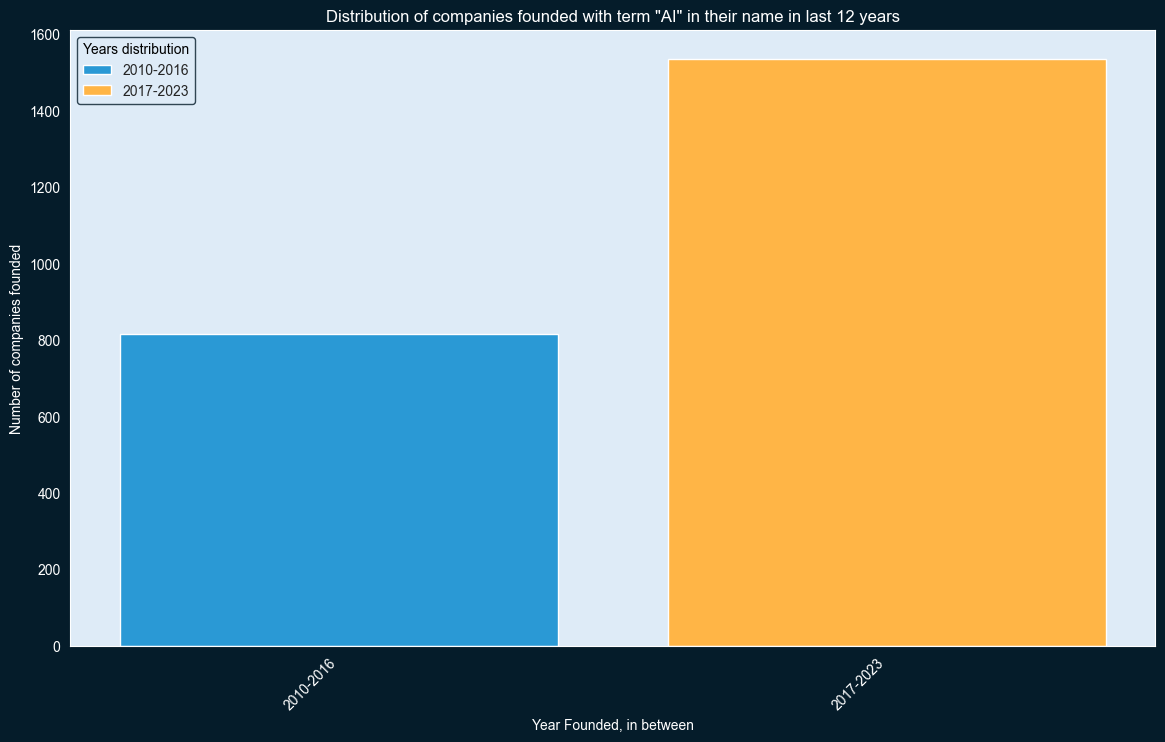

In [55]:
companies_2017_2023 = ai_comp.shape[0]

companies_2010_2016 = ai_comp_new.shape[0]
years_range = [ '2010-2016', '2017-2023',]
num_companies = [companies_2010_2016, companies_2017_2023]

fig, ax = plt.subplots(figsize=(14, 8))

# Set colors for text, outer background, inner background, and axis
text_color = '#FFFFFF'
outer_background_color = '#051C2A'
inner_background_color = '#DEEBF7'
axis_color = '#FFFFFF'

fig.patch.set_facecolor(outer_background_color)
ax.set_facecolor(inner_background_color)
ax.tick_params(axis='both', colors=axis_color)
ax.spines['bottom'].set_color(axis_color)
ax.spines['top'].set_color(axis_color)
ax.spines['right'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)


ax.bar(years_range, num_companies, color=['#2A99D5', '#FFB546'] , label=years_range, alpha=1)

ax.set_xlabel('Year Founded, in between', color=text_color)
ax.set_ylabel('Number of companies founded', color=text_color)
ax.set_title('Distribution of companies founded with term "AI" in their name in last 12 years', color=text_color)
ax.grid(False)
legend = ax.legend(title='Years distribution', facecolor=inner_background_color, edgecolor=outer_background_color)
legend.get_title().set_color('black')

plt.xticks(rotation=45, ha='right', color=text_color)
plt.savefig('AI_as_trend_in_company_names.svg', format='svg')
plt.show()